In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [3]:
fashion_minist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_minist.load_data()
x_vaild, x_train = x_train_all[:5000], x_train_all[5000:]
y_vaild, y_train = y_train_all[:5000], y_train_all[5000:]
print(x_vaild.shape, y_vaild.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


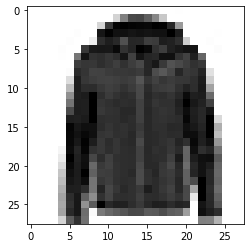

In [4]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
show_single_image(x_train[0])

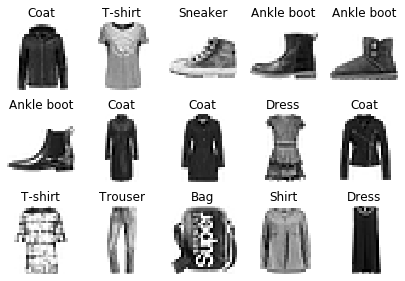

In [7]:
def show_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary',
                     interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal',
              'Shirt','Sneaker','Bag','Ankle boot']

show_images(3,5,x_train,y_train,class_names)
    

In [24]:
# 使用tf.keras.sequential构建模型
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='tanh'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
             metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_21 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(x_train,y_train,epochs=50,
         validation_data = (x_vaild,y_vaild))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 6s 105us/sample - loss: 0.9517 - accuracy: 0.6407 - val_loss: 0.8531 - val_accuracy: 0.6806
Epoch 2/50
55000/55000 [==============================] - 6s 102us/sample - loss: 0.9930 - accuracy: 0.6267 - val_loss: 1.0765 - val_accuracy: 0.6524
Epoch 3/50
55000/55000 [==============================] - 6s 104us/sample - loss: 1.0377 - accuracy: 0.6119 - val_loss: 0.9934 - val_accuracy: 0.6400
Epoch 4/50
55000/55000 [==============================] - 6s 104us/sample - loss: 1.0588 - accuracy: 0.6103 - val_loss: 1.0133 - val_accuracy: 0.6340
Epoch 5/50
55000/55000 [==============================] - 6s 102us/sample - loss: 1.1876 - accuracy: 0.5629 - val_loss: 1.4010 - val_accuracy: 0.4740
Epoch 6/50
55000/55000 [==============================] - 6s 102us/sample - loss: 1.2706 - accuracy: 0.5315 - val_loss: 1.2456 - val_accuracy: 0.5320
Epoch 7/50
55000/55000 [===========================

### 问题总结
如果将上面的模型改成下面的代码，则会出现loss=nan的情况
```python
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='tanh'))
model.add(keras.layers.Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
             metrics=['accuracy'])
```


In [34]:
type(history)

tensorflow.python.keras.callbacks.History

In [35]:
history.history # 训练过程中一些指标的值

{'loss': [0.9517076498811895,
  0.9930452363100919,
  1.037675647614219,
  1.0587894320574673,
  1.1876088796268809,
  1.2705999809785322,
  1.449276426523382,
  1.4086766925811767,
  1.421001330687783,
  1.5615504471518777,
  1.3468204005154696,
  1.274127142940868,
  1.5000686696312644,
  1.5890123192700474,
  1.6863883388172496,
  1.2491452862306074,
  1.2608922611756759,
  1.1767833421620455,
  1.036029415069927,
  1.3755656224684283,
  1.5886713132164696,
  1.5123807477690956,
  1.3941603204727173,
  1.352554641792991,
  1.5693379042712126,
  1.6692053210865367,
  1.6083627640464089,
  1.627031553407149,
  1.2226892432993108,
  1.2397103014512496,
  1.368226472421126,
  1.1919109214089134,
  1.2708056072755294,
  1.370329972041737,
  1.238871966379339,
  1.3710533214048906,
  1.353771014213562,
  1.286753603033586,
  1.285821640656211,
  1.4367121439153498,
  1.732173067890514,
  1.9135743374911223,
  1.836406335362521,
  1.8914710185137662,
  1.8916799779718572,
  1.7430520809346

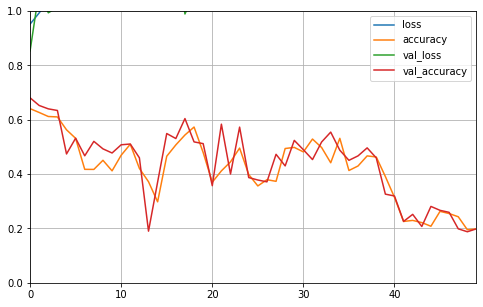

In [36]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)